In [215]:
import requests
import bs4
from bs4 import BeautifulSoup
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns


In [180]:
url = "https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield"

In [181]:
req = requests.get(url)
content = BeautifulSoup(req.text, 'lxml')
table = content.find('table', {'class' :'t-chart'})



In [182]:
headers = []
for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)


In [183]:
df = pd.DataFrame(columns = headers)


In [184]:
for row in table.find_all('tr')[1:]:
    data = row.find_all('td')
    row_data = [tr.text.strip() for tr in data]
    length = len(df)
    df.loc[length] = row_data

data

In [185]:
df

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,04/01/21,0.02,0.02,0.02,0.04,0.06,0.17,0.35,0.90,1.37,1.69,2.24,2.34
1,04/02/21,0.02,0.02,0.02,0.04,0.07,0.19,0.39,0.97,1.42,1.72,2.27,2.35
2,04/05/21,0.03,0.02,0.03,0.04,0.06,0.17,0.37,0.94,1.40,1.73,2.28,2.36
3,04/06/21,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.88,1.34,1.67,2.24,2.32
4,04/07/21,0.01,0.02,0.02,0.04,0.06,0.16,0.34,0.87,1.34,1.68,2.26,2.35
5,04/08/21,0.02,0.02,0.01,0.04,0.05,0.14,0.33,0.85,1.30,1.64,2.22,2.32
6,04/09/21,0.02,0.01,0.02,0.03,0.06,0.16,0.35,0.87,1.33,1.67,2.23,2.34
7,04/12/21,0.02,0.02,0.02,0.04,0.06,0.18,0.38,0.89,1.35,1.69,2.24,2.34
8,04/13/21,0.03,0.02,0.03,0.05,0.06,0.16,0.35,0.85,1.29,1.64,2.21,2.32
9,04/14/21,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.87,1.31,1.64,2.22,2.32


In [186]:
%matplotlib inline


In [187]:
df.dtypes


Date     object
1 mo     object
2 mo     object
3 mo     object
6 mo     object
1 yr     object
2 yr     object
3 yr     object
5 yr     object
7 yr     object
10 yr    object
20 yr    object
30 yr    object
dtype: object

In [188]:
df.columns

Index(['Date', '1 mo', '2 mo', '3 mo', '6 mo', '1 yr', '2 yr', '3 yr', '5 yr',
       '7 yr', '10 yr', '20 yr', '30 yr'],
      dtype='object')

In [189]:
selection = df.loc[:,['1 mo', '2 mo', '3 mo', '6 mo', '1 yr', '2 yr', '3 yr', '5 yr','7 yr', '10 yr', '20 yr', '30 yr']]


In [190]:
df['Date'] = pd.to_datetime(df['Date']) # casting date to dattime format

In [191]:
selection = selection.astype(np.float)

In [192]:
selection.dtypes

1 mo     float64
2 mo     float64
3 mo     float64
6 mo     float64
1 yr     float64
2 yr     float64
3 yr     float64
5 yr     float64
7 yr     float64
10 yr    float64
20 yr    float64
30 yr    float64
dtype: object

In [193]:
selection = pd.concat([df['Date'],selection],axis= 1)

In [194]:
selection

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,2021-04-01,0.02,0.02,0.02,0.04,0.06,0.17,0.35,0.90,1.37,1.69,2.24,2.34
1,2021-04-02,0.02,0.02,0.02,0.04,0.07,0.19,0.39,0.97,1.42,1.72,2.27,2.35
2,2021-04-05,0.03,0.02,0.03,0.04,0.06,0.17,0.37,0.94,1.40,1.73,2.28,2.36
3,2021-04-06,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.88,1.34,1.67,2.24,2.32
4,2021-04-07,0.01,0.02,0.02,0.04,0.06,0.16,0.34,0.87,1.34,1.68,2.26,2.35
5,2021-04-08,0.02,0.02,0.01,0.04,0.05,0.14,0.33,0.85,1.30,1.64,2.22,2.32
6,2021-04-09,0.02,0.01,0.02,0.03,0.06,0.16,0.35,0.87,1.33,1.67,2.23,2.34
7,2021-04-12,0.02,0.02,0.02,0.04,0.06,0.18,0.38,0.89,1.35,1.69,2.24,2.34
8,2021-04-13,0.03,0.02,0.03,0.05,0.06,0.16,0.35,0.85,1.29,1.64,2.21,2.32
9,2021-04-14,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.87,1.31,1.64,2.22,2.32


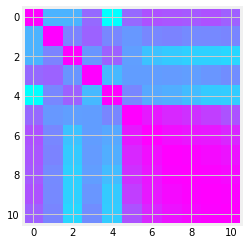

In [198]:
corr = selection.iloc[:,:12].corr()
plt.imshow(corr, cmap='cool',interpolation="nearest")
plt.show()

In [204]:
"""In the above heatmap, the lighter the value, the more the correlation between the features."""
selection


,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,2021-04-01,0.02,0.02,0.02,0.04,0.06,0.17,0.35,0.90,1.37,1.69,2.24,2.34
1,2021-04-02,0.02,0.02,0.02,0.04,0.07,0.19,0.39,0.97,1.42,1.72,2.27,2.35
2,2021-04-05,0.03,0.02,0.03,0.04,0.06,0.17,0.37,0.94,1.40,1.73,2.28,2.36
3,2021-04-06,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.88,1.34,1.67,2.24,2.32
4,2021-04-07,0.01,0.02,0.02,0.04,0.06,0.16,0.34,0.87,1.34,1.68,2.26,2.35
5,2021-04-08,0.02,0.02,0.01,0.04,0.05,0.14,0.33,0.85,1.30,1.64,2.22,2.32
6,2021-04-09,0.02,0.01,0.02,0.03,0.06,0.16,0.35,0.87,1.33,1.67,2.23,2.34
7,2021-04-12,0.02,0.02,0.02,0.04,0.06,0.18,0.38,0.89,1.35,1.69,2.24,2.34
8,2021-04-13,0.03,0.02,0.03,0.05,0.06,0.16,0.35,0.85,1.29,1.64,2.21,2.32
9,2021-04-14,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.87,1.31,1.64,2.22,2.32


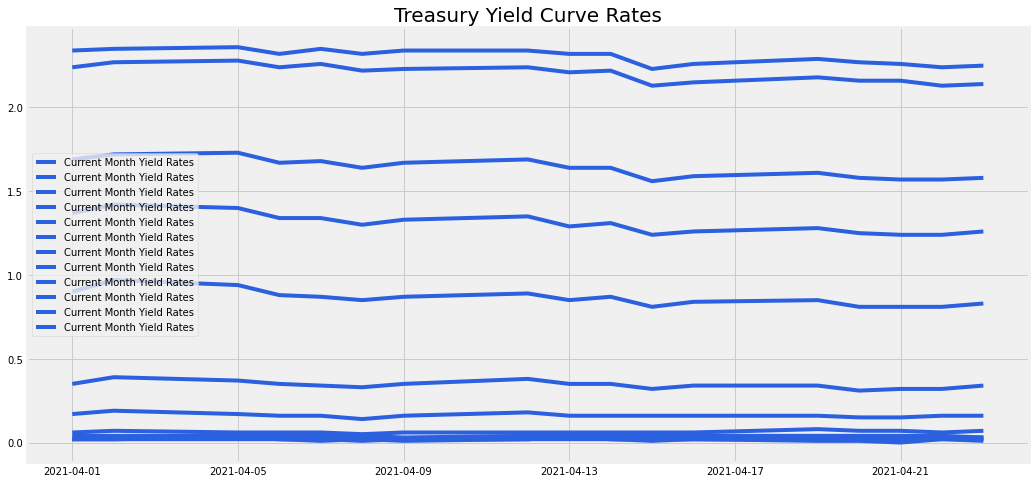

In [213]:
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(df['Date'],selection.iloc[:,1:],color='#2B60DE', label ='Current Month Yield Rates')
plt.title('Treasury Yield Curve Rates',fontsize=20)
plt.legend()
plt.show()

